# Научно-исследовательская работа. ИУ5Ц-84Б Тихонова Дарья

# Типовое исследование - решение задачи регрессии при помощи машинного обучения

## Разведочный анализ данных. Исследование и визуализация данных
### Текстовое описание набора данных.

В качестве набора данных мы будем использовать набор данных по предсказанию поступления в аспирантуру

Данные доступны по ссылке https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
Эта задача является актуальной для людей, собирающихся поступать в аспирантуру, и которым необходимо оценить свои шансы.

Датасет состоит из 1 файла:
- Admission_Predict.csv

Файл содержит следующие колонки:
- GRE Scores  - баллы за экзамен GRE для поступления в магистратуру/аспирантуру.
- TOEFL Scores - баллы за экзамен TOEFL по английскому.
- University Rating - рейтинг университета.
- SOP - мотивация соискателя
- LOR - сила рекомендательного письма.
- CGPA - средний балл аттестата.
- Research- наличие опыта в исследовательских работах.
- Chance of Admit - шанс приема.


Для решения **задачи регрессии** в качестве целевого признака будем использовать "Chance of Admit".

##

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, precision_score
import pandas as pd
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 
from sklearn.linear_model import SGDClassifier
sns.set(style="ticks")
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
from IPython.display import Image

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

## Основые характеристики датасета

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Проверим наличие пустых значений
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
# Список колонок с типами данных 
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Набор данных не содержит пропусков

## Построение графиков для понимания структуры данных

<Axes: >

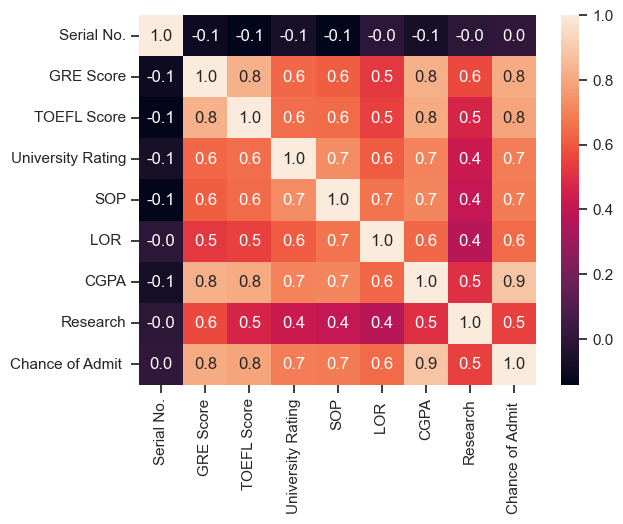

In [6]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')

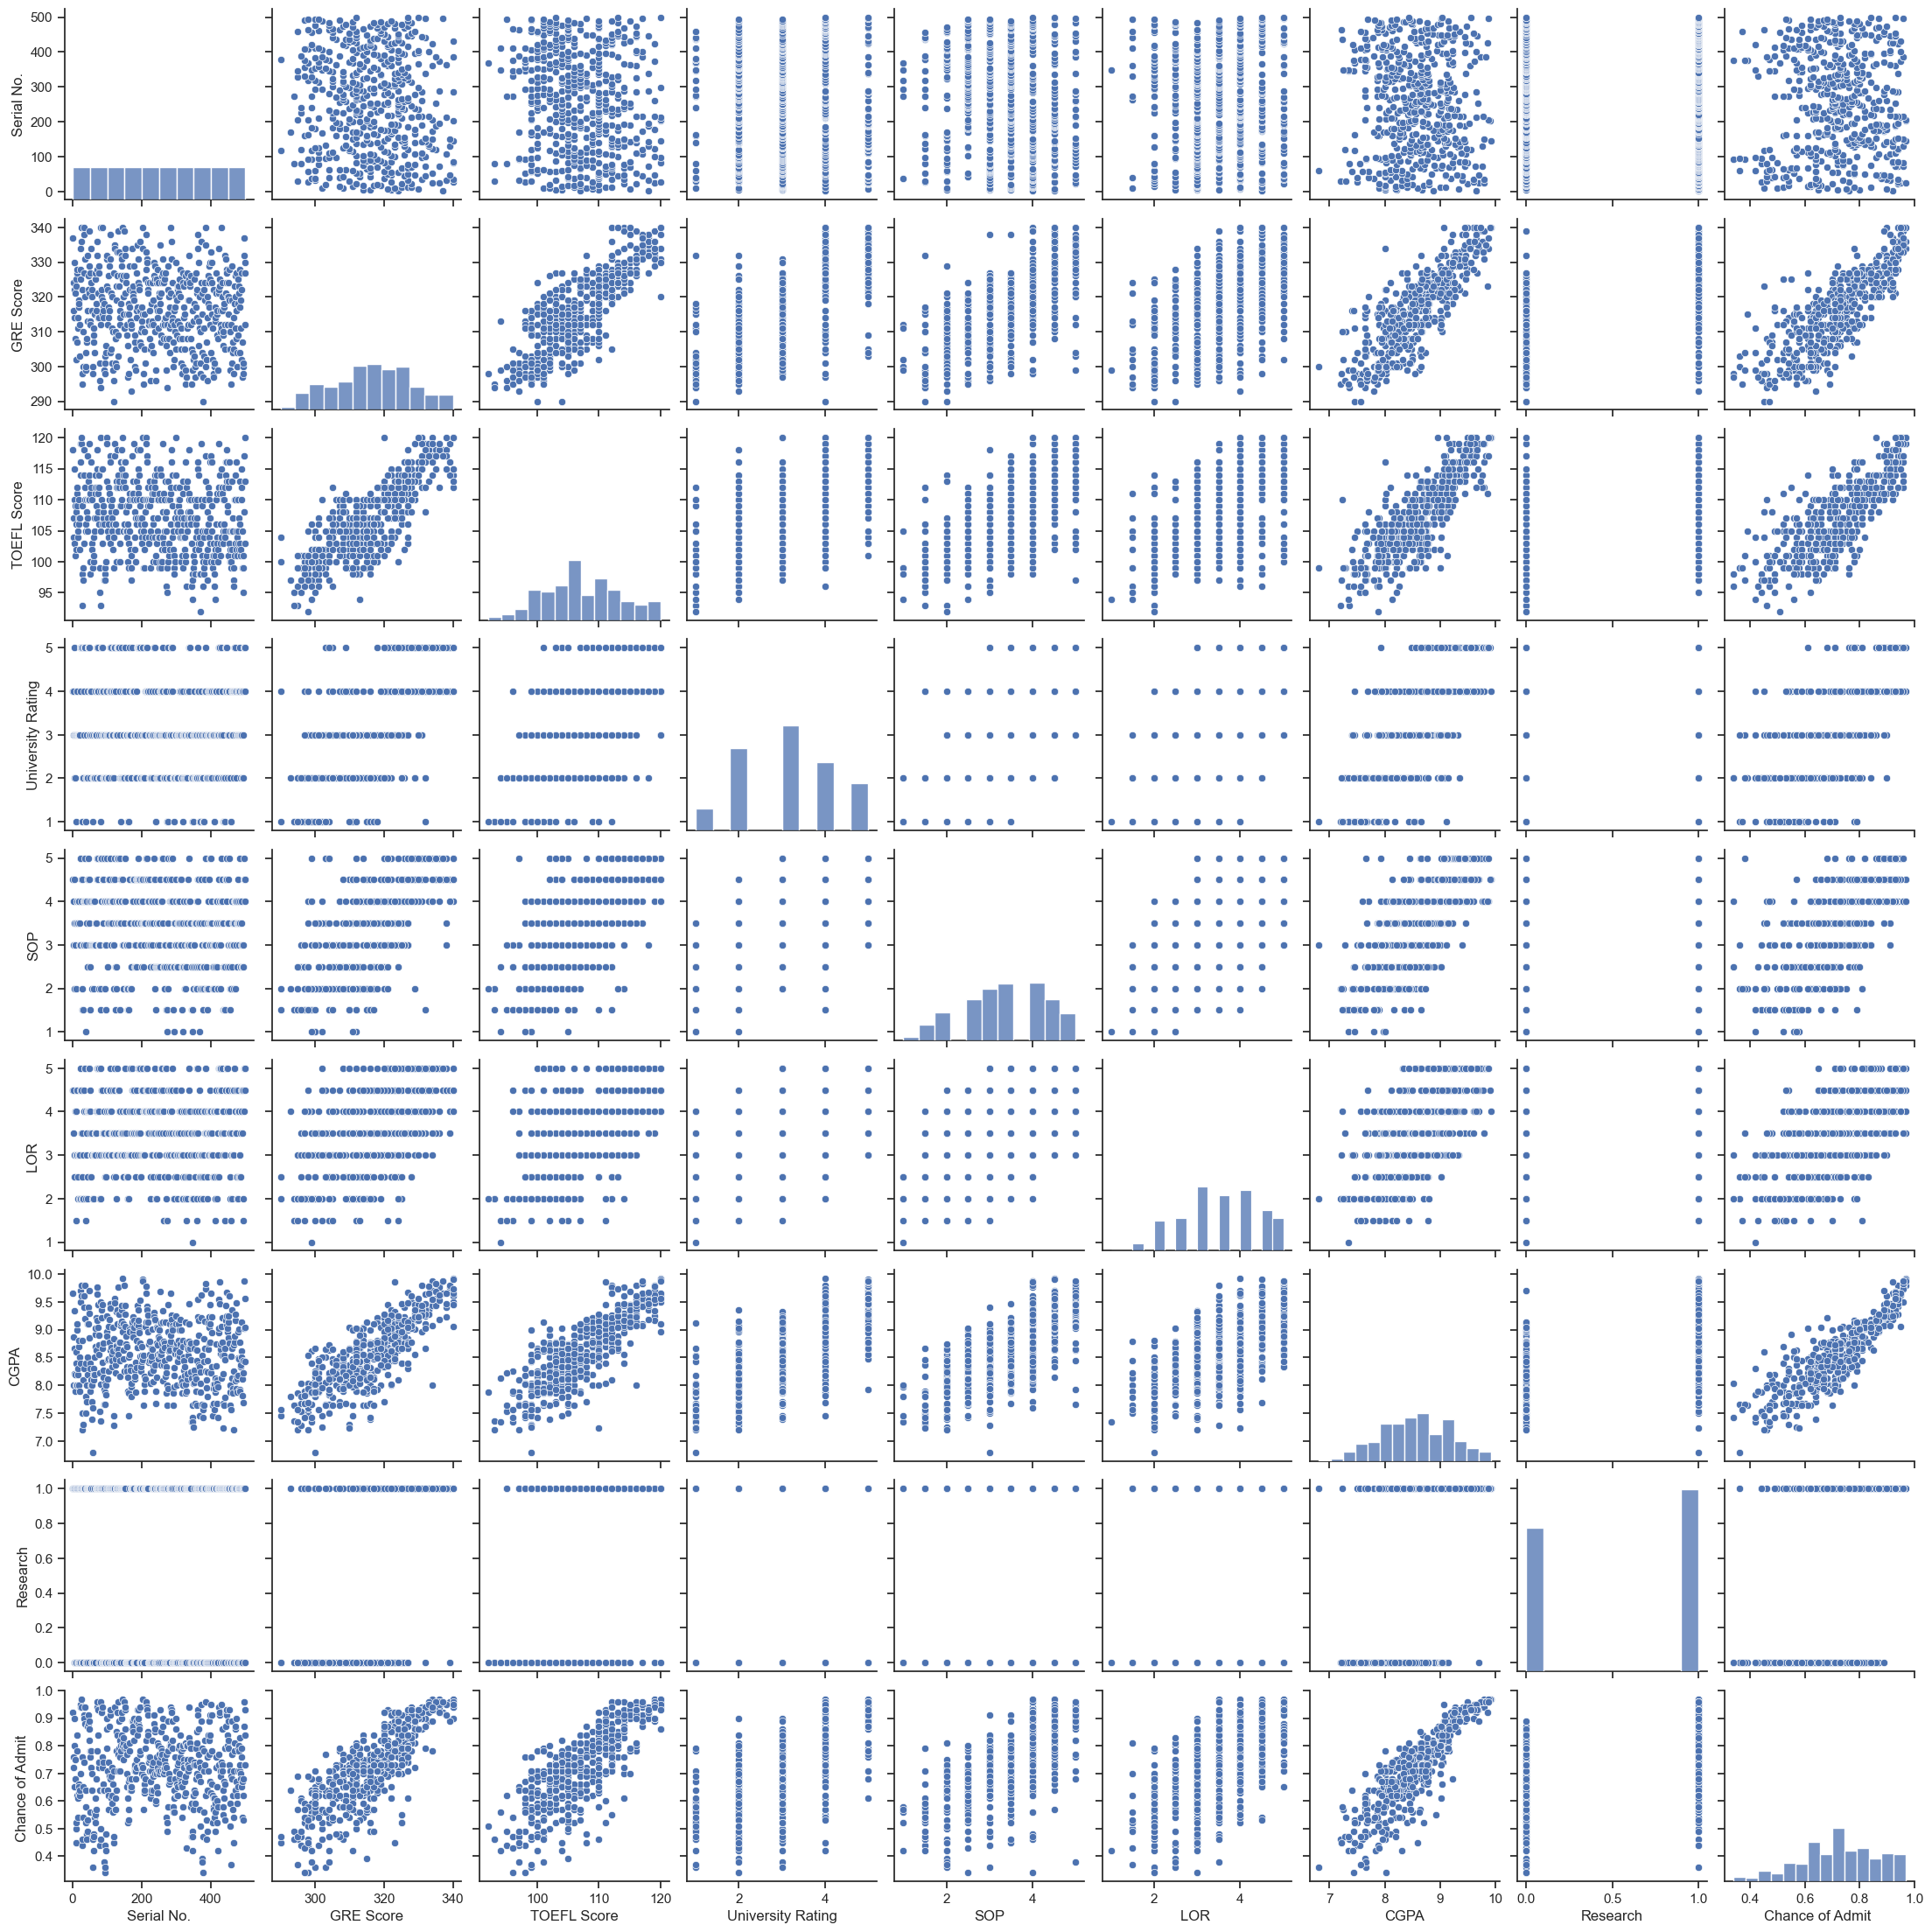

In [7]:
# Парные диаграммы
sns.pairplot(data)

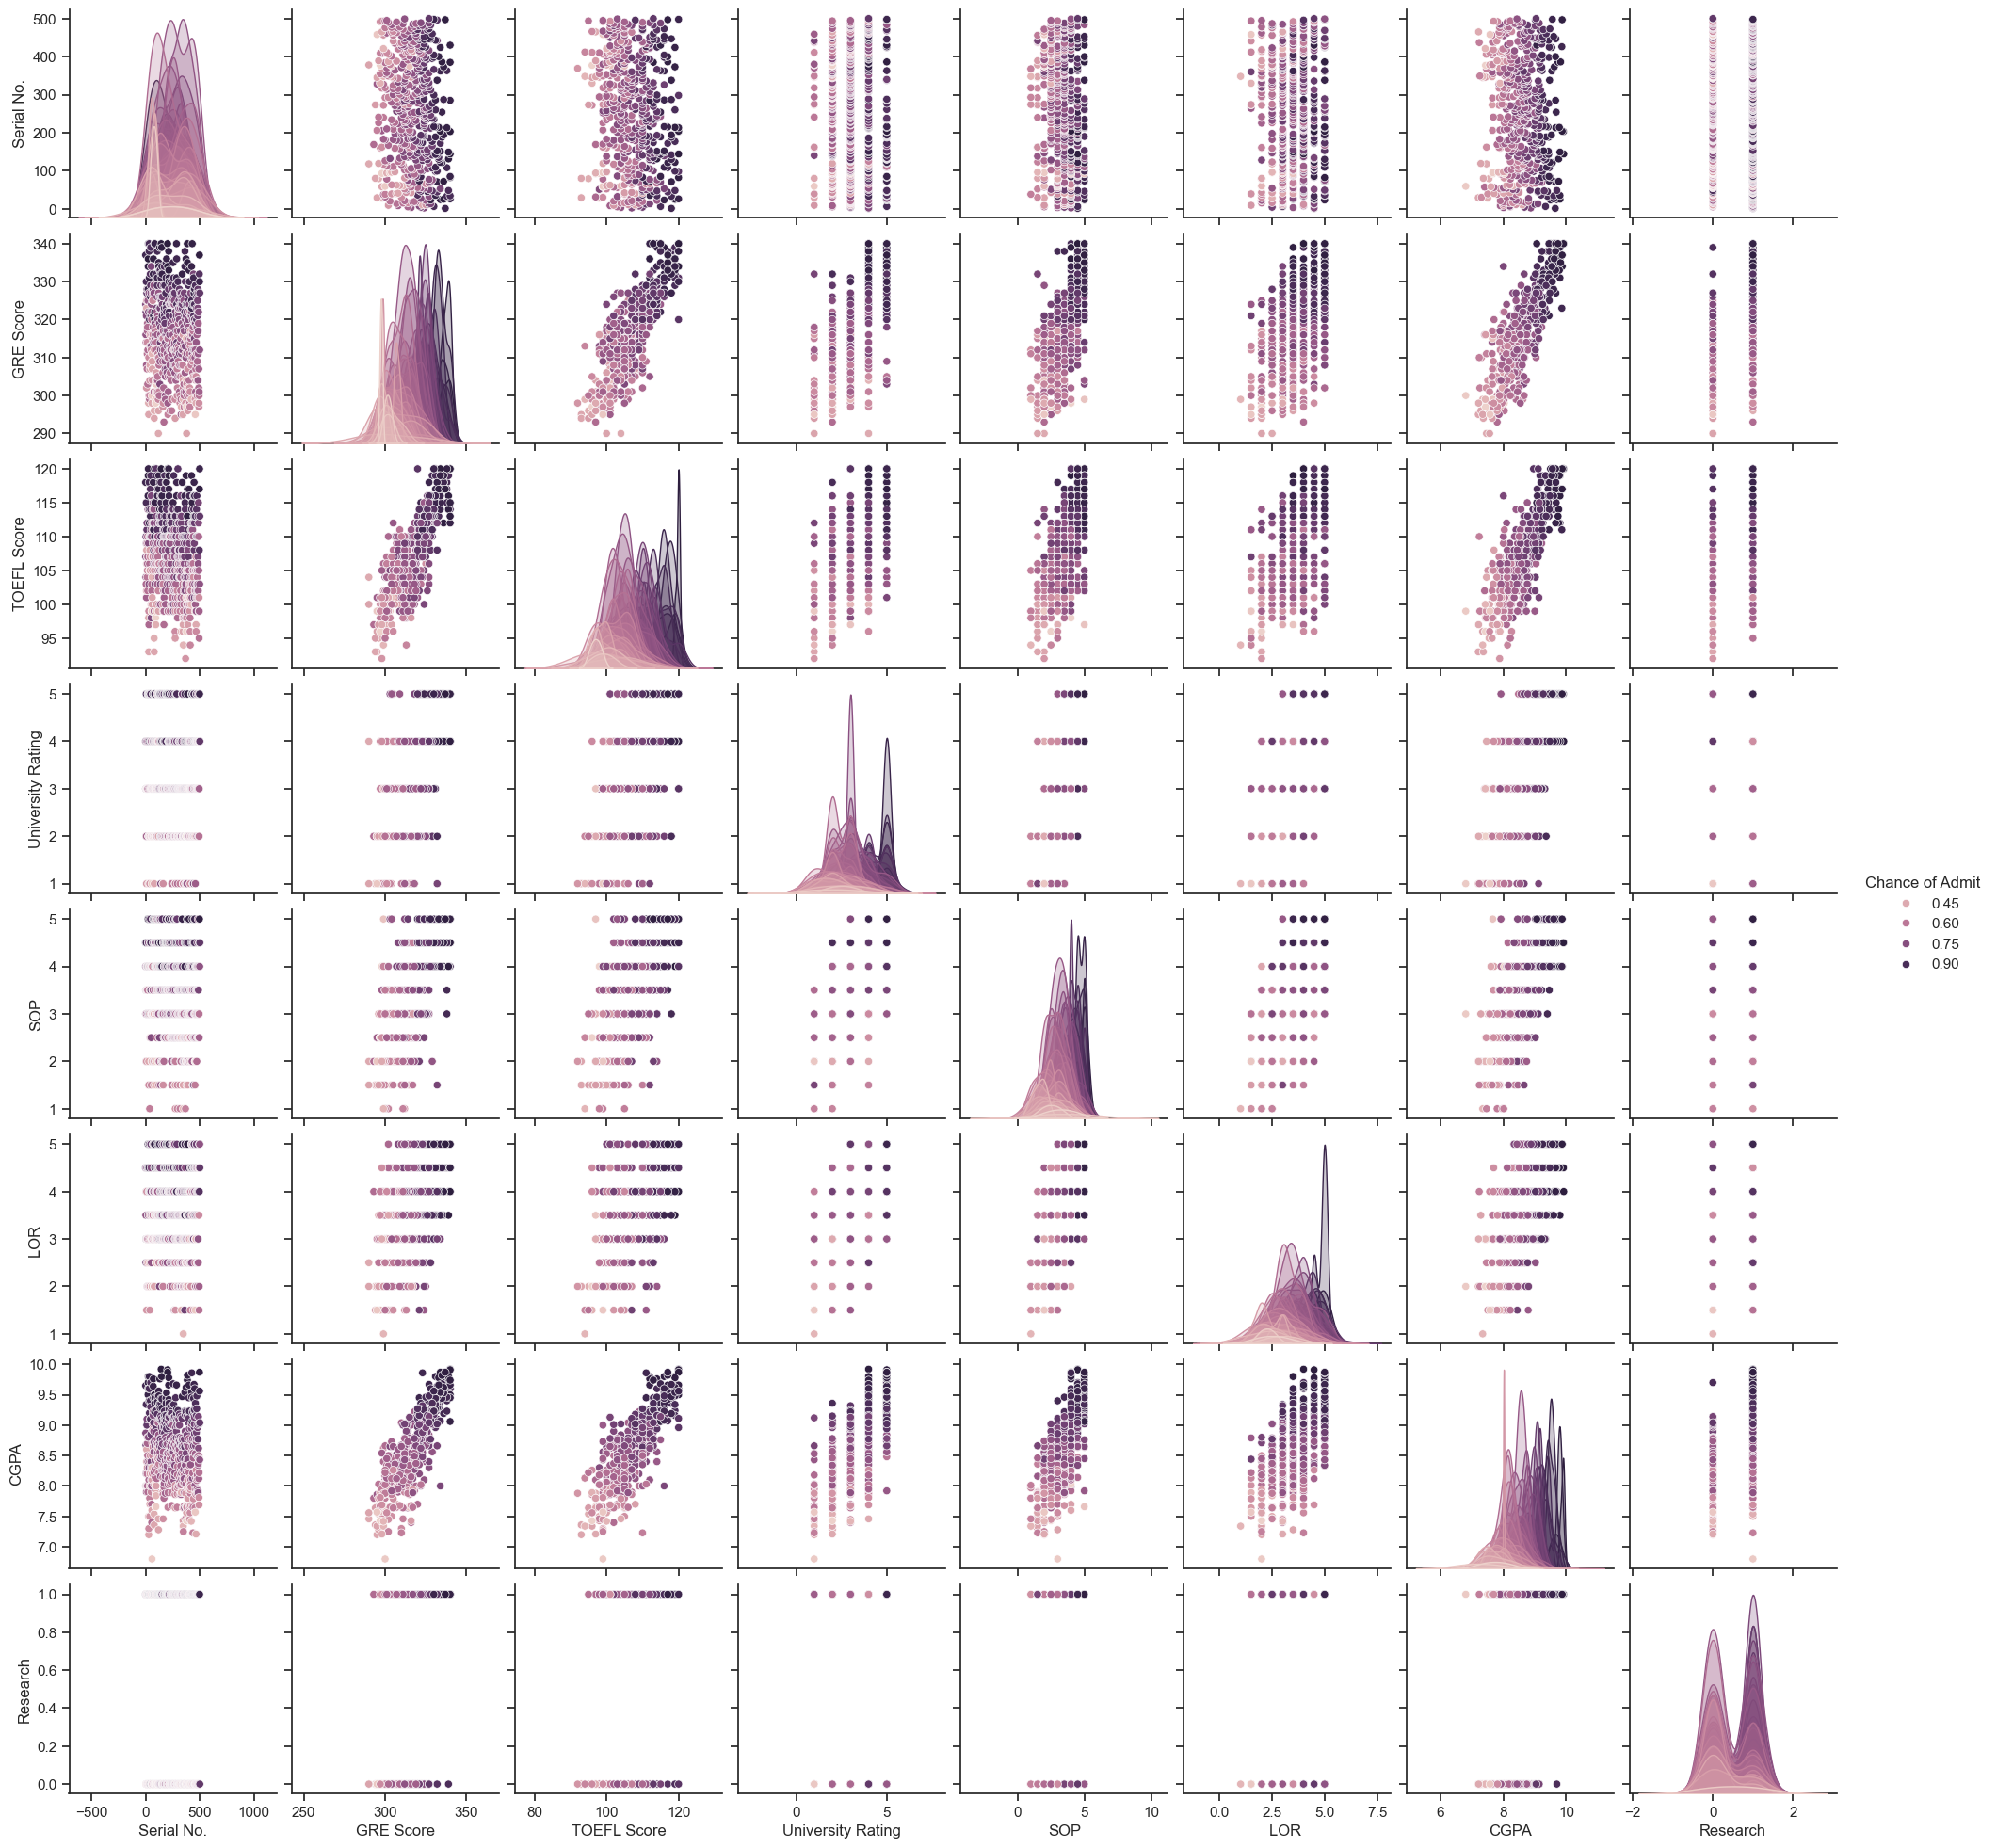

In [9]:
sns.pairplot(data, hue="Chance of Admit ")

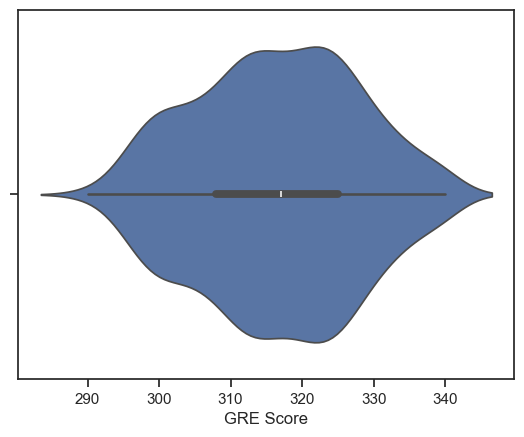

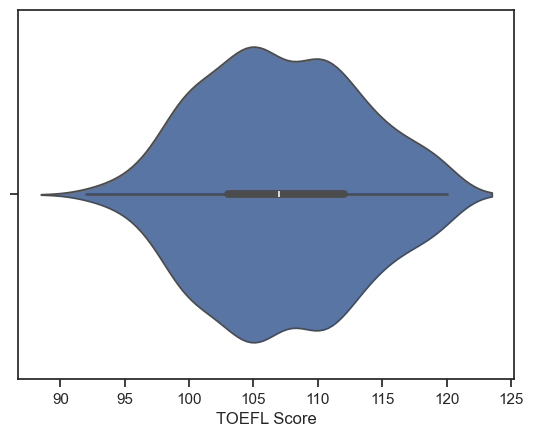

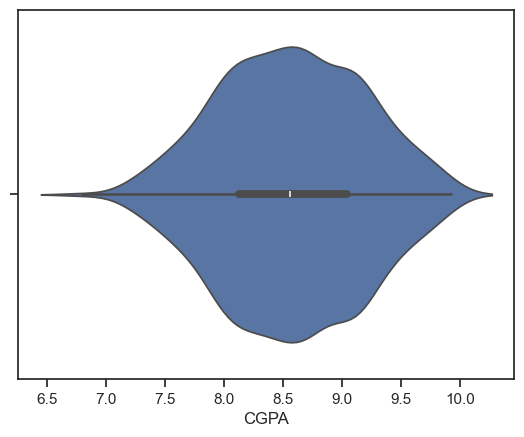

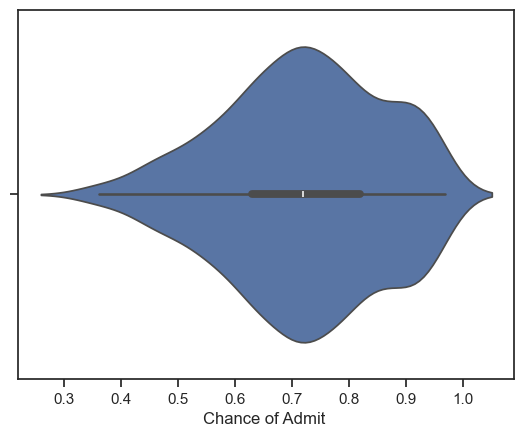

In [10]:
# Скрипичные диаграммы для числовых колонок
for col in ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']:
    sns.violinplot(x=data[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Разбиените на тестовую и обучающую выборки

In [11]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Для построения моделей будем использовать все признаки, кроме Serial No. поскольку эти данные не подходят для анализа.

Выполним масштабирование данных.

In [12]:
# Числовые колонки для масштабирования
scale_cols = ['GRE Score', 'TOEFL Score','University Rating', 'Research', 'SOP', 'CGPA']

In [13]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [14]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

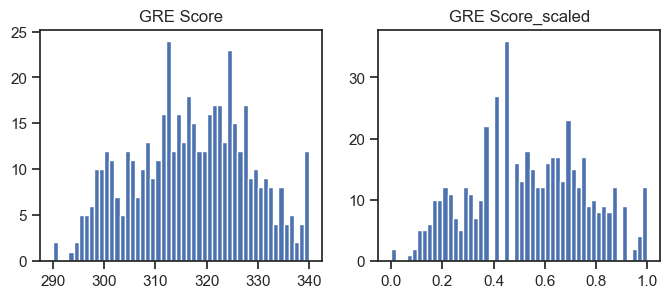

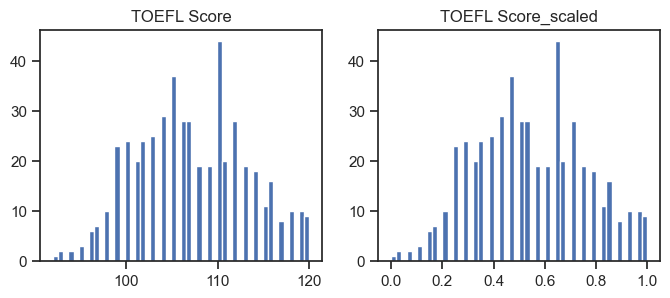

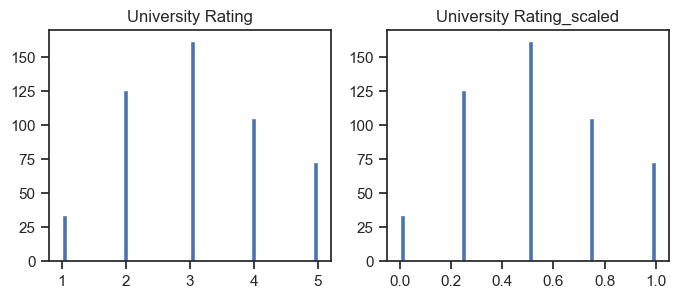

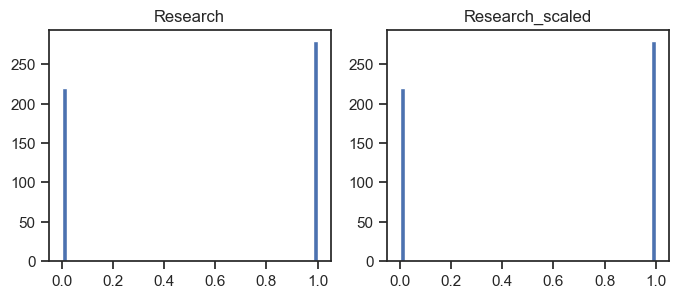

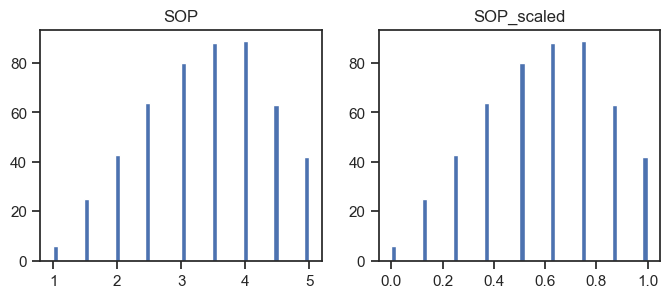

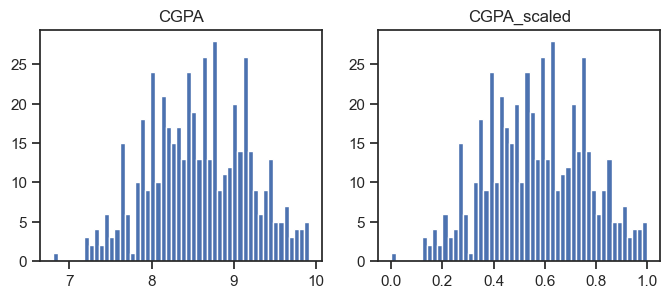

In [15]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Масштабирование не повлияло на набор данных

In [16]:
# Разобьем выборку на тестовую и обучающую 
# Признак и цель
X = data[['GRE Score_scaled', 'TOEFL Score_scaled','University Rating_scaled', 'Research_scaled', 'SOP_scaled', 'CGPA_scaled']]
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [17]:
corr_cols_1 = scale_cols + ['Chance of Admit ']
corr_cols_1

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'Research',
 'SOP',
 'CGPA',
 'Chance of Admit ']

In [18]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['Chance of Admit ']
corr_cols_2

['GRE Score_scaled',
 'TOEFL Score_scaled',
 'University Rating_scaled',
 'Research_scaled',
 'SOP_scaled',
 'CGPA_scaled',
 'Chance of Admit ']

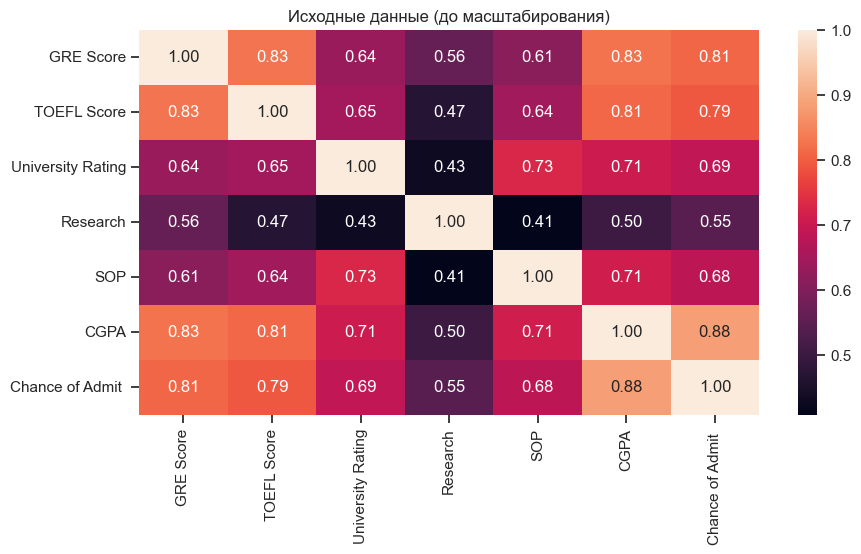

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

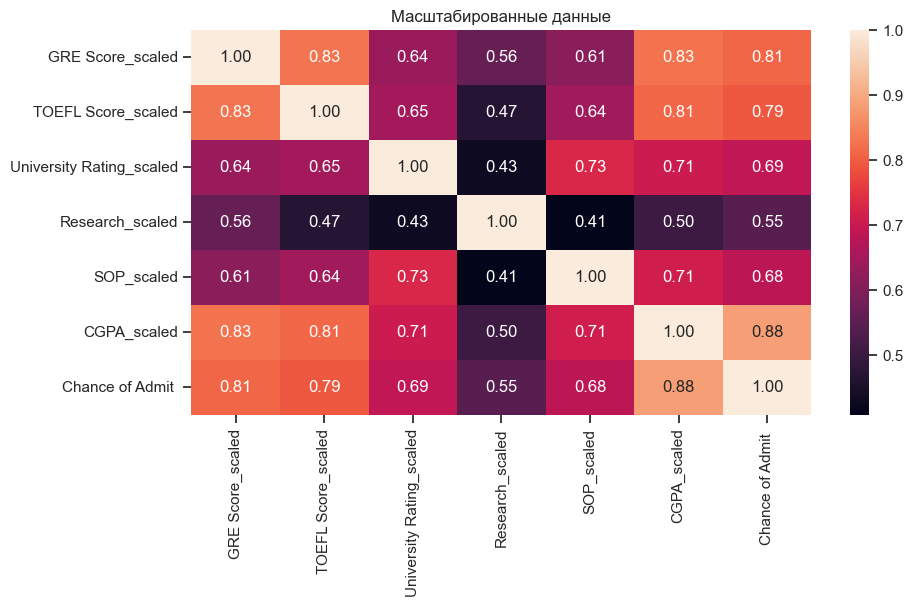

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:
- признаки GRE Score(0.81), TOEFL Score(0.79), CGPA(0.88) наиболее сильно корелируют с целевым признаком (Chance of Admit)
- Все остальные признаки так же имеют хорошую кореляцию с Chance of Admit (0.55+), поэтому оставим их всех для построения дальнейшей модели
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком.  На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения. 

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи регрессии будем использовать:

#### [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [22]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи регрессии.

Для задачи регрессии будем использовать следующие модели:
- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

In [23]:
# Признаки для задачи регресии
task_regr_cols = [
 'GRE Score_scaled',
 'TOEFL Score_scaled',
 'University Rating_scaled',
 'Research_scaled',
 'SOP_scaled',
 'CGPA_scaled',
]

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 6), (100, 6), (400,), (100,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [25]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [26]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [28]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [29]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

AttributeError: 'DataFrame' object has no attribute 'append'

In [30]:
n_range = np.array(range(1,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
         86, 91, 96])}]

In [31]:
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])}],
             scoring='neg_mean_squared_error')

In [32]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=np.int64(16))

In [33]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': np.int64(16)}

In [34]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'16'

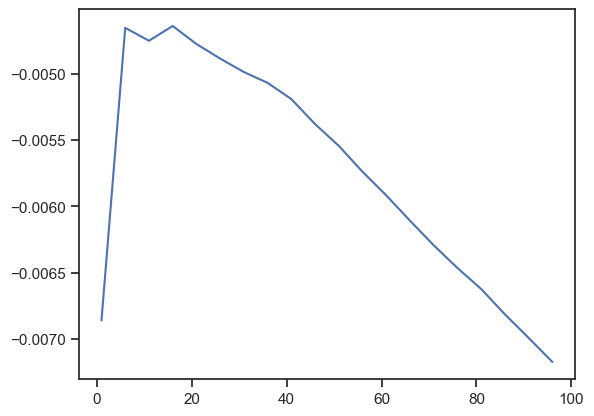

In [35]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

In [36]:
regr_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [37]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

AttributeError: 'DataFrame' object has no attribute 'append'

## Формирование выводов о качестве построенных моделей на основе выбранных метрик.

### Из-за малых значений некоторые графики не отображаются корректно, они будут дополнительн приведены в виде скриншотов

In [38]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array([], dtype=object)

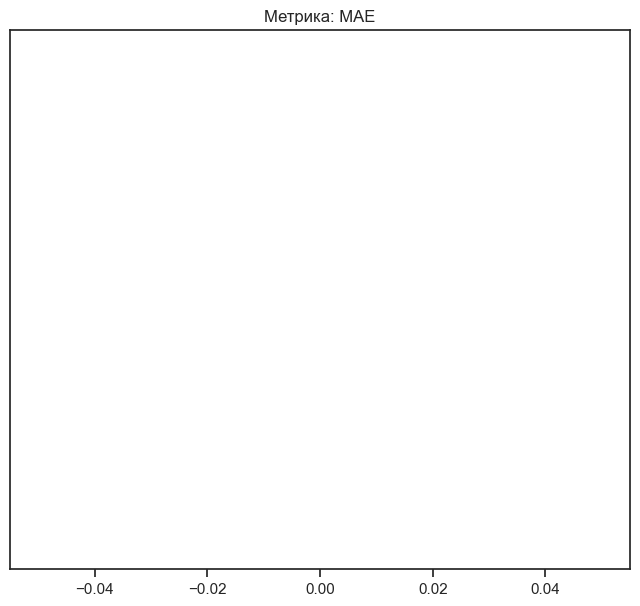

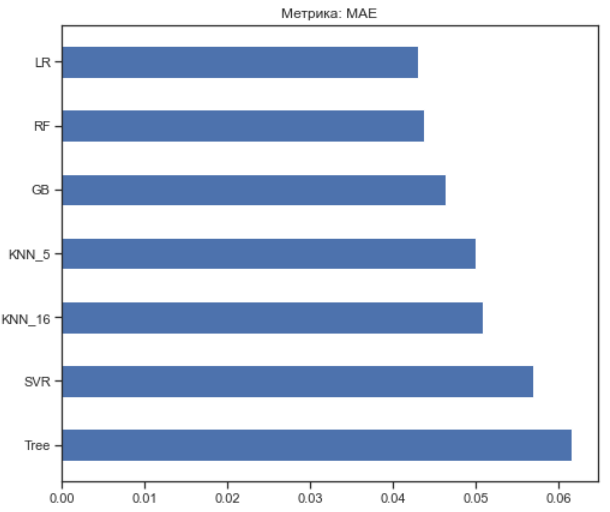

In [39]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(8, 7))
plt.show()
Image(filename='MAE.png')

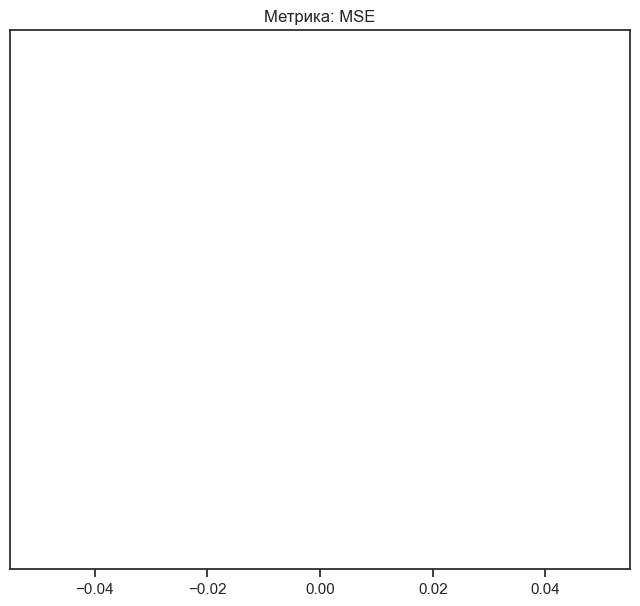

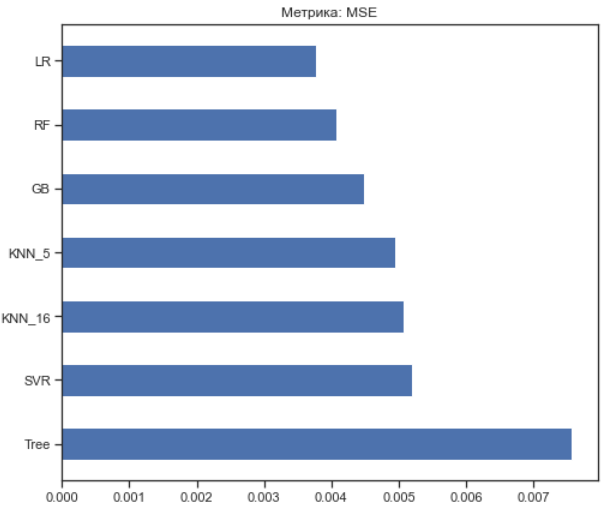

In [40]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(8, 7))
Image(filename='MSE.png')

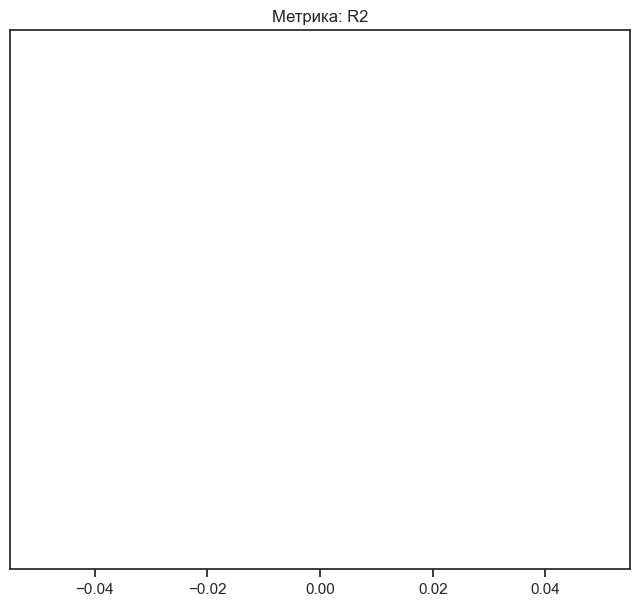

In [41]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(8, 7))

**Вывод: лучшими оказались модели на основе линейной регресии и случайного леса.**